# Toxic Comment Classification

### Importing Libraries

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

import warnings
warnings.simplefilter(action="ignore")

### Loading the Data

In [1]:
train = pd.read_csv('../dataset/train.csv')
test = pd.read_csv('../dataset/test.csv')

NameError: name 'pd' is not defined

In [3]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


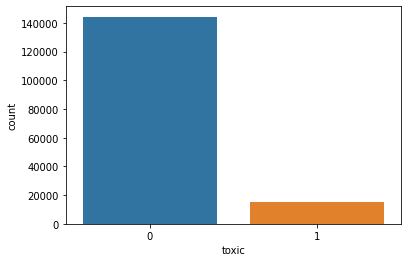

In [8]:
_ = sns.countplot(train['toxic'])

In [12]:
classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

y = train[classes].values
sentences = train["comment_text"]

In [16]:
max_features = 20000
tokenizer = Tokenizer(num_words = max_features)

In [19]:
tokenizer.fit_on_texts(list(sentences))

In [20]:
tokenized = tokenizer.texts_to_sequences(sentences)

In [24]:
tokenized[:1]

[[688,
  75,
  1,
  126,
  130,
  177,
  29,
  672,
  4511,
  12052,
  1116,
  86,
  331,
  51,
  2278,
  11448,
  50,
  6864,
  15,
  60,
  2756,
  148,
  7,
  2937,
  34,
  117,
  1221,
  15190,
  2825,
  4,
  45,
  59,
  244,
  1,
  365,
  31,
  1,
  38,
  27,
  143,
  73,
  3462,
  89,
  3085,
  4583,
  2273,
  985]]

In [25]:
maxlen = 200
X_train = pad_sequences(tokenized, maxlen=maxlen)

In [27]:
total_words = [len(comment) for comment in tokenized]
total_words

[47,
 17,
 42,
 114,
 13,
 11,
 8,
 19,
 84,
 11,
 499,
 11,
 51,
 143,
 38,
 104,
 10,
 3,
 17,
 76,
 40,
 9,
 81,
 13,
 219,
 16,
 49,
 58,
 27,
 13,
 17,
 11,
 11,
 146,
 55,
 141,
 184,
 56,
 25,
 206,
 35,
 37,
 106,
 8,
 60,
 123,
 12,
 19,
 118,
 183,
 454,
 24,
 32,
 89,
 8,
 19,
 12,
 111,
 312,
 66,
 18,
 55,
 5,
 164,
 29,
 57,
 17,
 30,
 38,
 33,
 32,
 61,
 11,
 217,
 32,
 9,
 41,
 50,
 30,
 13,
 173,
 473,
 94,
 53,
 17,
 22,
 13,
 8,
 58,
 4,
 148,
 69,
 17,
 16,
 91,
 92,
 10,
 22,
 30,
 51,
 13,
 19,
 16,
 76,
 13,
 7,
 149,
 104,
 24,
 21,
 15,
 8,
 109,
 73,
 225,
 10,
 98,
 26,
 48,
 7,
 38,
 53,
 44,
 30,
 22,
 24,
 527,
 32,
 38,
 76,
 41,
 27,
 50,
 35,
 108,
 34,
 15,
 44,
 8,
 8,
 158,
 67,
 320,
 56,
 21,
 115,
 6,
 36,
 80,
 71,
 119,
 92,
 10,
 79,
 18,
 40,
 25,
 52,
 41,
 18,
 538,
 41,
 418,
 15,
 28,
 31,
 115,
 152,
 26,
 65,
 57,
 10,
 75,
 5,
 32,
 5,
 26,
 13,
 18,
 126,
 226,
 10,
 6,
 35,
 24,
 25,
 22,
 18,
 46,
 41,
 46,
 66,
 44,
 14,
 9,
 47,
 3

In [28]:
inp = Input(shape=(maxlen, ))
print(inp)
embed_size = 128
x = Embedding(max_features, embed_size)(inp)
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(6, activation="softmax")(x)

In [29]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [31]:
batch_size = 64
epochs = 5
model.fit(X_train,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
4488/4488 [==============================] - 938s 209ms/step - loss: 0.0711 - accuracy: 0.9374 - val_loss: 0.0509 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 988s 220ms/step - loss: 0.0450 - accuracy: 0.9834 - val_loss: 0.0471 - val_accuracy: 0.9939


In [33]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 128)          2560000   
_________________________________________________________________
lstm_layer (LSTM)            (None, 200, 60)           45360     
_________________________________________________________________
global_max_pooling1d (Global (None, 60)                0         
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)               

In [35]:
test = pd.read_csv('../dataset/test.csv')

In [36]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
list_sentence = test["comment_text"]

In [37]:
max_features = 20000
tokenizer = Tokenizer(num_words = max_features)

In [38]:
tokenizer.fit_on_texts(list(list_sentence))

In [39]:
list_tokenized = tokenizer.texts_to_sequences(list_sentence)

In [40]:
maxlen = 200
X_test = pad_sequences(list_tokenized, maxlen=maxlen)

In [41]:
total_words = [len(comment) for comment in list_tokenized]
total_words

[70,
 10,
 4,
 38,
 7,
 16,
 28,
 6,
 95,
 39,
 22,
 65,
 47,
 78,
 54,
 16,
 5,
 27,
 62,
 4,
 8,
 17,
 19,
 72,
 29,
 155,
 23,
 13,
 37,
 69,
 18,
 4,
 42,
 70,
 0,
 31,
 37,
 4,
 649,
 211,
 3,
 68,
 15,
 113,
 165,
 22,
 29,
 26,
 12,
 26,
 11,
 61,
 46,
 11,
 96,
 39,
 13,
 9,
 48,
 6,
 2,
 220,
 109,
 9,
 60,
 3,
 9,
 17,
 131,
 7,
 8,
 32,
 55,
 37,
 23,
 26,
 13,
 17,
 5,
 0,
 86,
 12,
 14,
 118,
 125,
 28,
 437,
 303,
 159,
 38,
 11,
 60,
 12,
 85,
 38,
 48,
 200,
 22,
 28,
 4,
 61,
 45,
 6,
 221,
 47,
 38,
 98,
 40,
 21,
 43,
 65,
 61,
 51,
 76,
 11,
 93,
 4,
 113,
 61,
 6,
 191,
 32,
 35,
 48,
 140,
 97,
 6,
 301,
 0,
 19,
 228,
 22,
 29,
 15,
 20,
 4,
 299,
 21,
 18,
 96,
 58,
 24,
 40,
 115,
 13,
 590,
 10,
 20,
 3,
 67,
 14,
 24,
 4,
 30,
 29,
 18,
 51,
 52,
 70,
 35,
 61,
 118,
 21,
 22,
 57,
 849,
 14,
 38,
 75,
 24,
 7,
 11,
 16,
 12,
 22,
 3,
 40,
 28,
 9,
 12,
 623,
 25,
 510,
 28,
 141,
 23,
 19,
 30,
 50,
 9,
 8,
 28,
 30,
 4,
 4,
 32,
 7,
 7,
 5,
 19,
 115,
 28,


In [45]:
pred = model.predict(X_test)

In [46]:
pred[0]

array([0.782316  , 0.01187995, 0.5673894 , 0.00624645, 0.3234616 ,
       0.02676407], dtype=float32)